In [103]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from webdriver_manager import driver
from webdriver_manager.chrome import ChromeDriverManager
import pandas as pd

import matplotlib.pyplot as plt

In [104]:
import plotly as px

In [105]:
plt.style.use('ggplot')

In [106]:
import numpy as np

In [107]:
from google.protobuf import message
import streamlit as st
from textblob import TextBlob
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt


In [108]:
product = pd.read_csv('C:/Users/dell/Major_project/test/vivo_reviews.csv')
product

,Unnamed: 0,title,date,verified_product,content,rating
0,0,Karthick,2021-08-30,Verified Purchase,"Camera quality is good, while on the flash lig...",4
1,1,Nirmal,2021-10-03,Verified Purchase,"This is a value for money product, massive dat...",5
2,2,Vijay Shinde,2021-10-15,Verified Purchase,same supplier refuse me delivery in my pincood...,1
3,3,Abbas Shaikh,2021-12-07,Verified Purchase,"All in all after using for one week, battery l...",4
4,4,Dia Alphonso,2021-10-23,Verified Purchase,Phone a lil heavy Coz it glass ..it's gonna mi...,5
...,...,...,...,...,...,...
87,87,S D Kaushik,2021-10-28,NaN,Like the looks but screen is not super amoled ...,2
88,88,JB Singh Rajawat,2021-10-13,NaN,Best performance I like best features\nBattary...,5
89,89,piyush,2021-12-01,Verified Purchase,Good,5
90,90,Nagireddy Kanala,2021-10-27,NaN,Good phone the recorder is not up to mark j ha...,4


In [109]:
def get_sentiment_data(sentence):
    if isinstance(sentence,str):
        blob= TextBlob(sentence)
        p = [sentence.polarity for sentence in blob.sentences] 
        return p
    else:
        return np.nan
def get_review_sentiment(sentence):
    if isinstance(sentence,str):
        blob= TextBlob(sentence)
        p = [sentence.polarity for sentence in blob.sentences] 
        pavg = sum(p)/len(p)
        return pavg
    else:
        return np.nan
def get_review_subjectivity(sentence):
    if isinstance(sentence,str):
        blob= TextBlob(sentence)
        s = [sentence.subjectivity for sentence in blob.sentences] 
        savg = sum(s)/len(s)
        return savg
    else:
        return np.nan

def get_review_sentence_count(sentence):
    if isinstance(sentence,str):
        return len(sentence.split())
    return 0

def get_sentiment(value):
    if value > 0:
        return "positive"
    elif value < 0:
        return "negative"
    else:
        return "nuetral"


In [110]:
product

,Unnamed: 0,title,date,verified_product,content,rating
0,0,Karthick,2021-08-30,Verified Purchase,"Camera quality is good, while on the flash lig...",4
1,1,Nirmal,2021-10-03,Verified Purchase,"This is a value for money product, massive dat...",5
2,2,Vijay Shinde,2021-10-15,Verified Purchase,same supplier refuse me delivery in my pincood...,1
3,3,Abbas Shaikh,2021-12-07,Verified Purchase,"All in all after using for one week, battery l...",4
4,4,Dia Alphonso,2021-10-23,Verified Purchase,Phone a lil heavy Coz it glass ..it's gonna mi...,5
...,...,...,...,...,...,...
87,87,S D Kaushik,2021-10-28,NaN,Like the looks but screen is not super amoled ...,2
88,88,JB Singh Rajawat,2021-10-13,NaN,Best performance I like best features\nBattary...,5
89,89,piyush,2021-12-01,Verified Purchase,Good,5
90,90,Nagireddy Kanala,2021-10-27,NaN,Good phone the recorder is not up to mark j ha...,4


In [111]:
product.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 92 entries, 0 to 91
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Unnamed: 0        92 non-null     int64 
 1   title             92 non-null     object
 2   date              92 non-null     object
 3   verified_product  78 non-null     object
 4   content           89 non-null     object
 5   rating            92 non-null     int64 
dtypes: int64(2), object(4)
memory usage: 4.4+ KB


In [112]:
product['sentence_wise_sentiment']=product.content.apply(get_sentiment_data)
product['review_sentiment']=product.content.apply(get_review_sentiment)
product['review_subjectivity']=product.content.apply(get_review_subjectivity)
product['sentence_count']=product.content.apply(get_review_sentence_count)
product['sentiment']=product.review_sentiment.apply(get_sentiment)
product.head(2)


,Unnamed: 0,title,date,verified_product,content,rating,sentence_wise_sentiment,review_sentiment,review_subjectivity,sentence_count,sentiment
0,0,Karthick,2021-08-30,Verified Purchase,"Camera quality is good, while on the flash lig...",4,"[0.23666666666666666, 0.4, 0.3166666666666667,...",0.230667,0.539667,34,positive
1,1,Nirmal,2021-10-03,Verified Purchase,"This is a value for money product, massive dat...",5,[0.23185714285714284],0.231857,0.749714,52,positive


In [113]:
pie_out = product.sentiment.value_counts().reset_index()
px.pie(pie_out,names='index',values='sentiment')

<AxesSubplot:xlabel='sentiment', ylabel='count'>

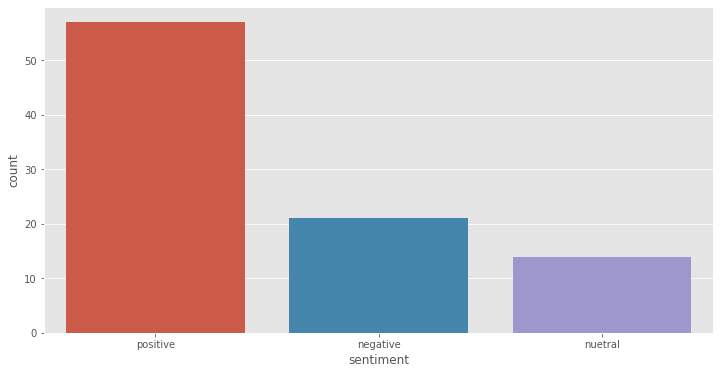

In [114]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=product)

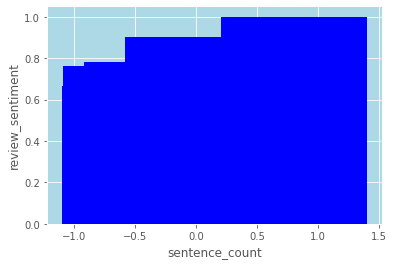

In [115]:
ax=plt.axes()
ax.set_facecolor('lightblue')
plt.bar(product['review_sentiment'],product['review_subjectivity'],color='b')
plt.xlabel('sentence_count')
plt.ylabel('review_sentiment')
plt.show()

more charts

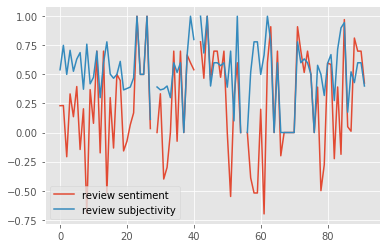

In [116]:
plt.plot(product['review_sentiment'],label='review sentiment')
plt.plot(product['review_subjectivity'],label='review subjectivity')
plt.legend()
plt.show()

In [117]:
product

,Unnamed: 0,title,date,verified_product,content,rating,sentence_wise_sentiment,review_sentiment,review_subjectivity,sentence_count,sentiment
0,0,Karthick,2021-08-30,Verified Purchase,"Camera quality is good, while on the flash lig...",4,"[0.23666666666666666, 0.4, 0.3166666666666667,...",0.230667,0.539667,34,positive
1,1,Nirmal,2021-10-03,Verified Purchase,"This is a value for money product, massive dat...",5,[0.23185714285714284],0.231857,0.749714,52,positive
2,2,Vijay Shinde,2021-10-15,Verified Purchase,same supplier refuse me delivery in my pincood...,1,[-0.20833333333333334],-0.208333,0.500000,27,negative
3,3,Abbas Shaikh,2021-12-07,Verified Purchase,"All in all after using for one week, battery l...",4,"[0.475, 0.4, 0.3, 0.7, 0.2, -0.45, 0.7]",0.332143,0.707143,70,positive
4,4,Dia Alphonso,2021-10-23,Verified Purchase,Phone a lil heavy Coz it glass ..it's gonna mi...,5,[0.13593750000000002],0.135938,0.526563,78,positive
...,...,...,...,...,...,...,...,...,...,...,...
87,87,S D Kaushik,2021-10-28,NaN,Like the looks but screen is not super amoled ...,2,[0.011111111111111108],0.011111,0.522222,24,positive
88,88,JB Singh Rajawat,2021-10-13,NaN,Best performance I like best features\nBattary...,5,[0.8125],0.812500,0.429167,21,positive
89,89,piyush,2021-12-01,Verified Purchase,Good,5,[0.7],0.700000,0.600000,1,positive
90,90,Nagireddy Kanala,2021-10-27,NaN,Good phone the recorder is not up to mark j ha...,4,[0.7],0.700000,0.600000,20,positive


In [118]:
fig=px.scatter()

In [119]:
fig = px.scatter(product,x='review_sentiment',y='review_subjectivity',width=800, height=400)
fig.show()

In [120]:
fig = px.histogram(product,x='review_sentiment',y='review_subjectivity')
fig.show()

In [121]:
fig = px.bar(product,x='sentiment',y='review_sentiment')
fig.show()